In [1]:
import pickle
import logging
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cmdstanpy
from cmdstanpy import CmdStanModel

from baynes.plotter import FitPlotter
from baynes.toyMC import SpectraSampler
from baynes.analysis import standard_analysis, multithreaded_run
from baynes.probability import HoSpectrum, hdi
from baynes.model_utils import *

matplotlib.rcParams.update({'font.size': 13})
plt.style.use('seaborn-v0_8-whitegrid')
cmdstanpy.utils.get_logger().setLevel(logging.ERROR)


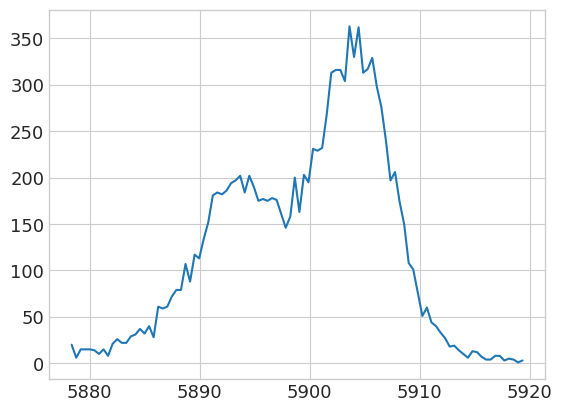

In [7]:
datContent = [i.strip().split() for i in open("Fe_cal_7.dat").readlines()]
data = [float(d) for d in datContent[0]]
counts, edges = np.histogram(data, 100)
centers = np.array([(edges[i]+edges[i+1])/2 for i in range(len(edges)-1)])
plt.plot(centers, counts)

In [3]:
set_models_path("/home/pietro/work/TESI/baynes/src/stan/")

 Path to models directory set, add 
 export STAN_MODELS_DIR="/home/pietro/work/TESI/baynes/src/stan/" 
 to .bashrc to make the change permanent.


In [4]:
stan_file= get_stan_file("poisGP.stan")
model = CmdStanModel(stan_file=stan_file,
                     cpp_options={"STAN_THREADS": True,"jN":'j16'},
                     stanc_options={"include-paths": get_models_path()+"/include/"})

Found .stan file  /home/pietro/work/TESI/baynes/src/stan/GP/poisGP.stan



 ---- Sampling the priors ---- 


 ---- Prior predictive check ---- 



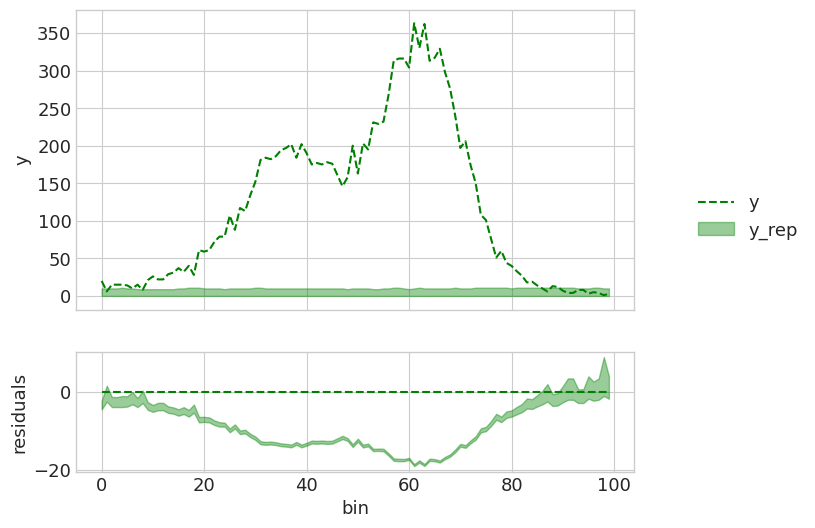


 ---- Prior distribustions ---- 



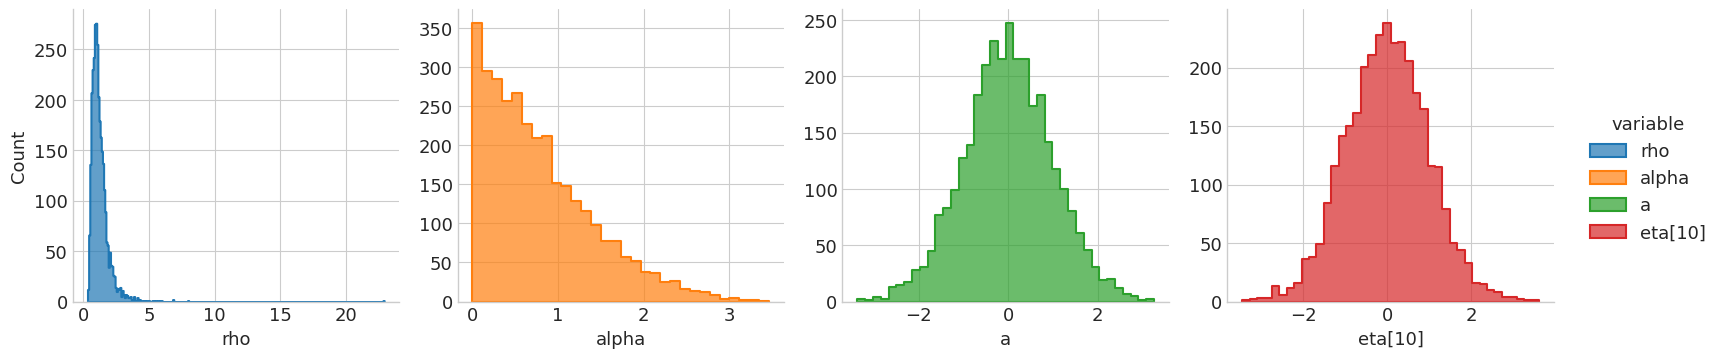


 ---- Fitting the model ---- 



chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

chain 7 |          | 00:00 Status

chain 8 |          | 00:00 Status

chain 9 |          | 00:00 Status

chain 10 |          | 00:00 Status

chain 11 |          | 00:00 Status

chain 12 |          | 00:00 Status

chain 13 |          | 00:00 Status

chain 14 |          | 00:00 Status

chain 15 |          | 00:00 Status

chain 16 |          | 00:00 Status

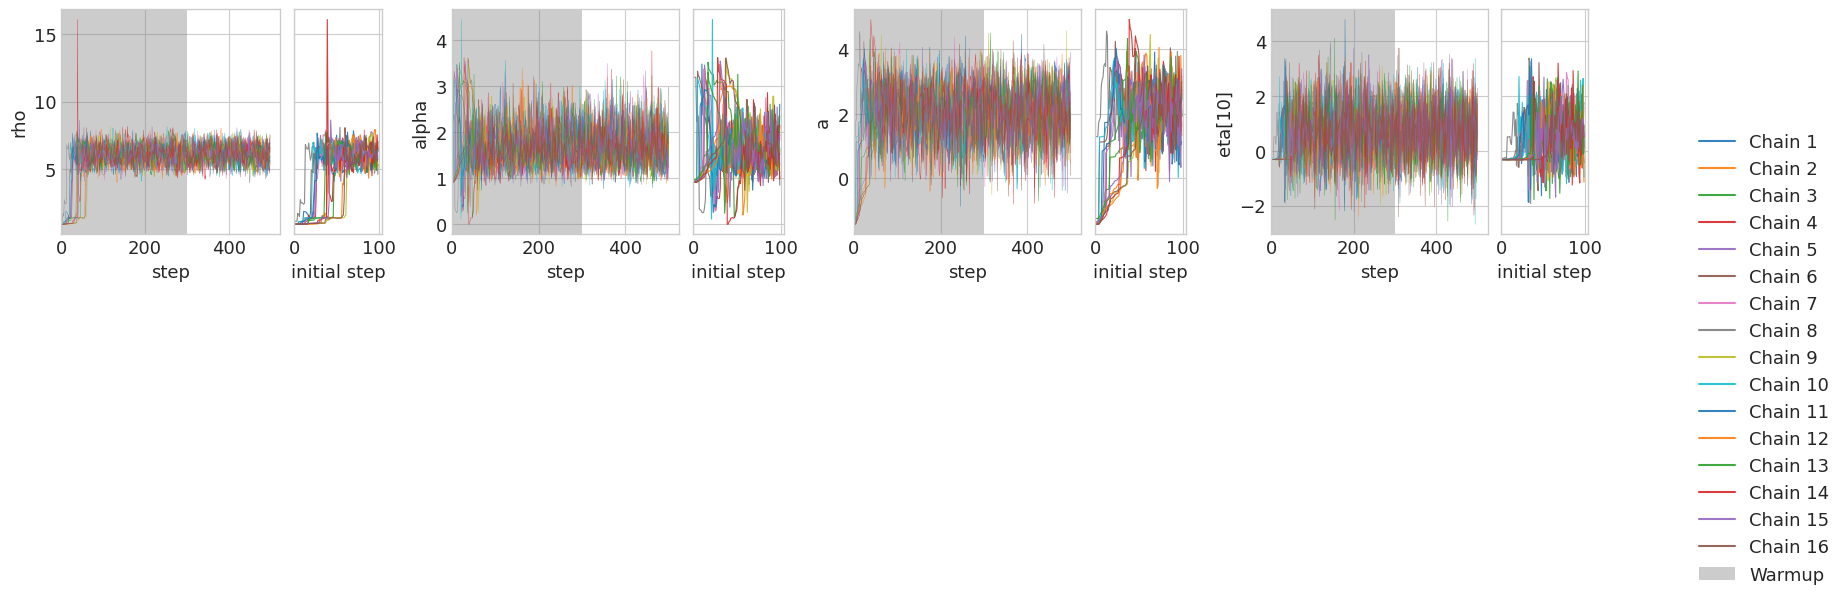


 ---- Prior predictive check ---- 



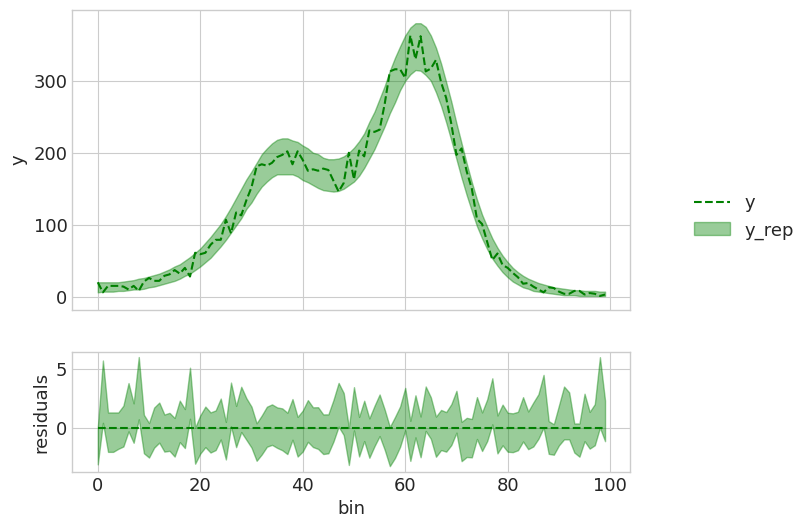


 ---- Posterior distribustions ---- 



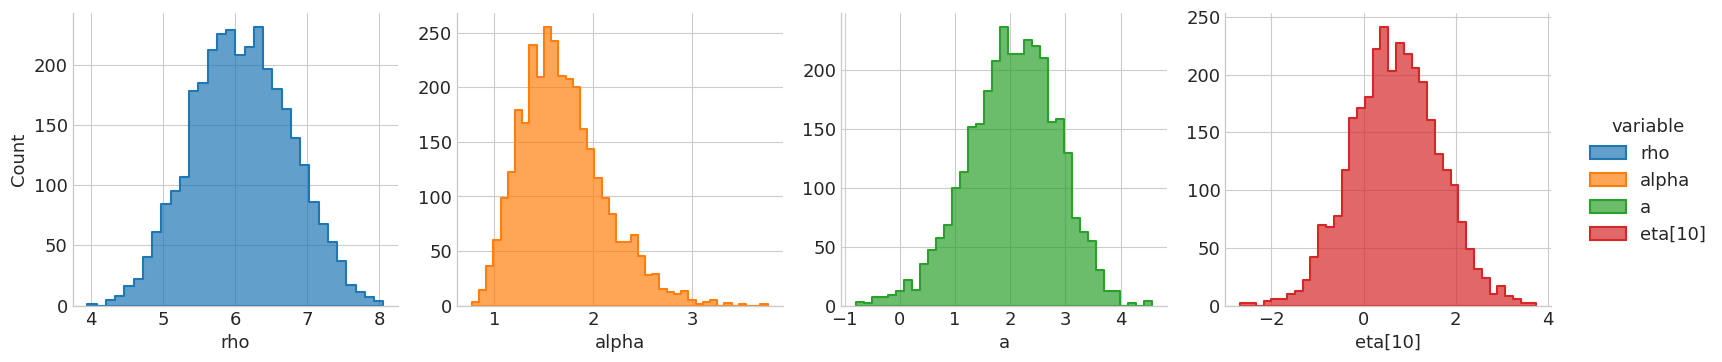


 ---- Prior vs posterior comparison ---- 



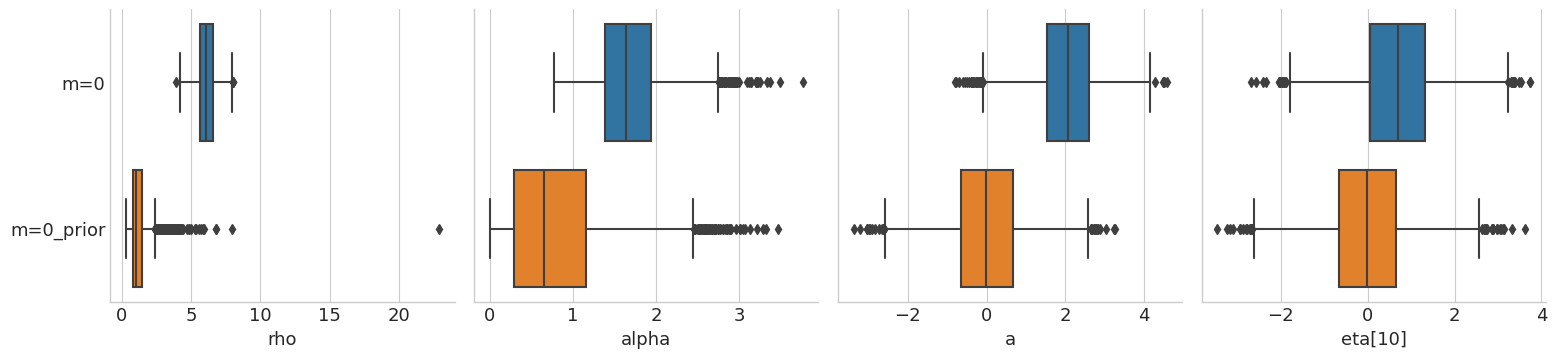

In [9]:
data = {'N': len(counts),
        'x': centers,
        'y': counts}

sampler_kwargs={
    'chains': 16,
    'iter_warmup': 300,
    'iter_sampling': 200,
    'save_warmup': True, 
    'adapt_delta': 0.9,
    'max_treedepth': 12,
    'threads_per_chain':2,
}
plot_pars=['rho', 'alpha', 'a', 'eta[10]']
p = FitPlotter(col_wrap=4, style='seaborn-v0_8-whitegrid', save=True)
fit = standard_analysis(model, data, p, sampler_kwargs, fit_title='m=0', data_key='y', rep_key='y_rep',plot_params=plot_pars)

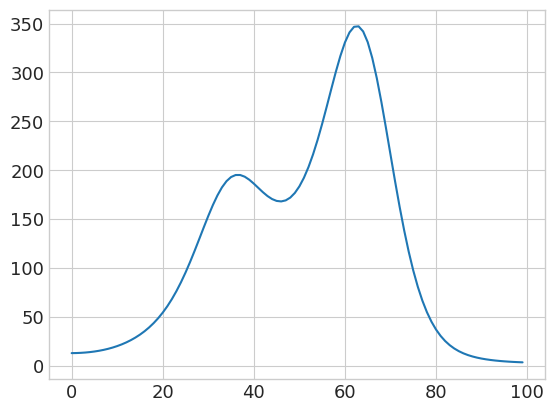

In [29]:
summary = fit.summary()
plt.plot([np.exp(summary['Mean'].loc['f['+str(i)+']']+summary['Mean'].loc['a']) for i in range(1, len(counts)+1)])

In [33]:
fig = p.figures['predictive_check_1']

In [34]:
ax=fig.axes[0]
ax.plot([np.exp(summary['Mean'].loc['f['+str(i)+']']+summary['Mean'].loc['a']) for i in range(1, len(counts)+1)])

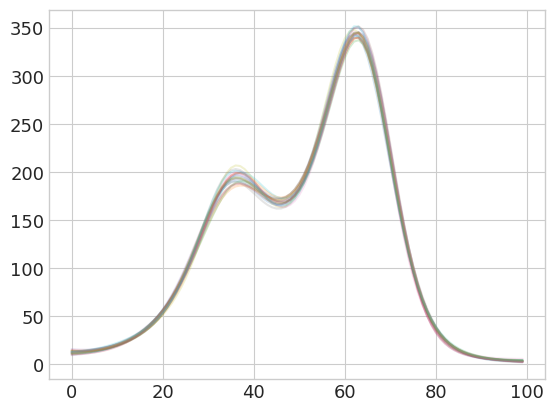

In [46]:
for i in range(20):
    plt.plot(np.exp(fit.draws_pd('f').to_numpy()[i]+fit.draws_pd('a').to_numpy()[i]), alpha=0.2)

In [40]:
fit.draws_pd('f').to

f[1]      0.312141
f[2]      0.322948
f[3]      0.342294
f[4]      0.369921
f[5]      0.405090
            ...   
f[96]    -0.849396
f[97]    -0.938033
f[98]    -1.019630
f[99]    -1.094400
f[100]   -1.162860
Name: 1, Length: 100, dtype: float64

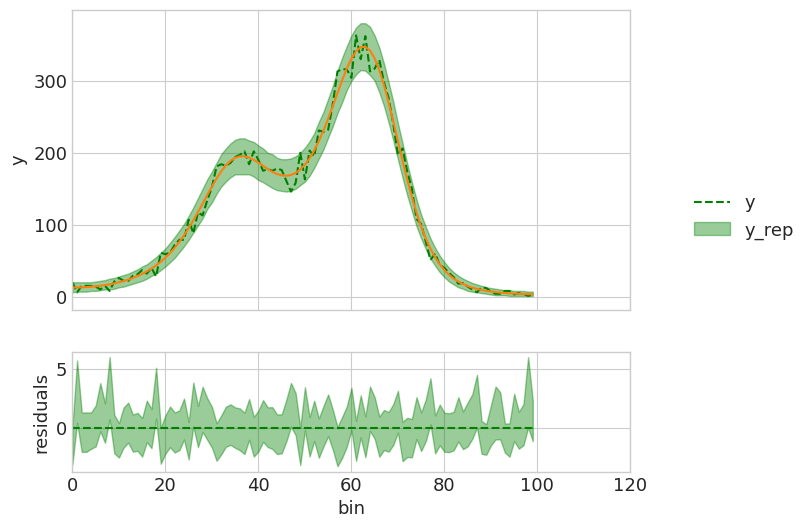

In [36]:
ax.set_xlim(0, 120)
fig

In [14]:
fit.column_names

('lp__',
 'accept_stat__',
 'stepsize__',
 'treedepth__',
 'n_leapfrog__',
 'divergent__',
 'energy__',
 'rho',
 'alpha',
 'a',
 'eta[1]',
 'eta[2]',
 'eta[3]',
 'eta[4]',
 'eta[5]',
 'eta[6]',
 'eta[7]',
 'eta[8]',
 'eta[9]',
 'eta[10]',
 'eta[11]',
 'eta[12]',
 'eta[13]',
 'eta[14]',
 'eta[15]',
 'eta[16]',
 'eta[17]',
 'eta[18]',
 'eta[19]',
 'eta[20]',
 'eta[21]',
 'eta[22]',
 'eta[23]',
 'eta[24]',
 'eta[25]',
 'eta[26]',
 'eta[27]',
 'eta[28]',
 'eta[29]',
 'eta[30]',
 'eta[31]',
 'eta[32]',
 'eta[33]',
 'eta[34]',
 'eta[35]',
 'eta[36]',
 'eta[37]',
 'eta[38]',
 'eta[39]',
 'eta[40]',
 'eta[41]',
 'eta[42]',
 'eta[43]',
 'eta[44]',
 'eta[45]',
 'eta[46]',
 'eta[47]',
 'eta[48]',
 'eta[49]',
 'eta[50]',
 'eta[51]',
 'eta[52]',
 'eta[53]',
 'eta[54]',
 'eta[55]',
 'eta[56]',
 'eta[57]',
 'eta[58]',
 'eta[59]',
 'eta[60]',
 'eta[61]',
 'eta[62]',
 'eta[63]',
 'eta[64]',
 'eta[65]',
 'eta[66]',
 'eta[67]',
 'eta[68]',
 'eta[69]',
 'eta[70]',
 'eta[71]',
 'eta[72]',
 'eta[73]',
 'eta

In [15]:
data={"N_bins": len(counts), 
      'N_peaks': 2,
      'counts': counts, 
      'x': edges, 
      'p_FWHM': 5, 
      'p_gamma': [0.5,0.5], 
      'p_E0': [5890, 5905],
      'p_i': [0.3,0.7],
      'N_ev': len(datContent[0]),
      'prior': 1}


sampler_kwargs={
    'chains': 4,
    'iter_warmup': 500,
    'iter_sampling': 500,
    'save_warmup': True, 
    'adapt_delta': 0.9,
    'threads_per_chain':8,
    'inits': {'E0s':[0, 10], 'i':[0.3,0.7], 'gamma': [0.5,0.5], 'sigma': 3, 'bkg': 0.1}
}

plot_pars = ['m_nu', 'Q', 'bkg', 'sigma']
p = FitPlotter(col_wrap=4, style='seaborn-v0_8-whitegrid', save=True)
fit = standard_analysis(model, data, p, sampler_kwargs, fit_title='m=0')

00:03:28 - cmdstanpy - ERROR - CmdStan error: error during processing Operation not permitted



 ---- Sampling the priors ---- 



RuntimeError: Error during sampling:
Exception: lorentzians_model_namespace::log_prob: E0 is not a valid ordered vector. The element at 2 is nan, but should be greater than the previous element, nan (in '/home/pietro/work/TESI/baynes/src/stan/lorentzians/lorentzians.stan', line 37, column 2 to column 22)
Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=1
 cmd (chain 1):
	['/home/pietro/work/TESI/baynes/src/stan/lorentzians/lorentzians', 'id=1', 'random', 'seed=40613', 'data', 'file=/tmp/tmp6ef_d998/ojbia1zb.json', 'init=/tmp/tmp6ef_d998/2_wvhmfv.json', 'output', 'file=/tmp/tmp6ef_d998/lorentzians6ev50cyc/lorentzians-20230708000328.csv', 'method=sample', 'num_samples=500', 'num_warmup=500', 'save_warmup=1', 'algorithm=hmc', 'adapt', 'engaged=1', 'delta=0.9', 'num_chains=4']
 retcodes=[1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6ef_d998/lorentzians6ev50cyc/lorentzians-20230708000328_1.csv
 console_msgs (if any):
	/tmp/tmp6ef_d998/lorentzians6ev50cyc/lorentzians-20230708000328-stdout.txt
Consider re-running with show_console=True if the above output is unclear!

In [30]:
len(datContent)

2

Number of events in ROI:  2778


<AxesSubplot: xlabel='E [eV]', ylabel='Counts'>

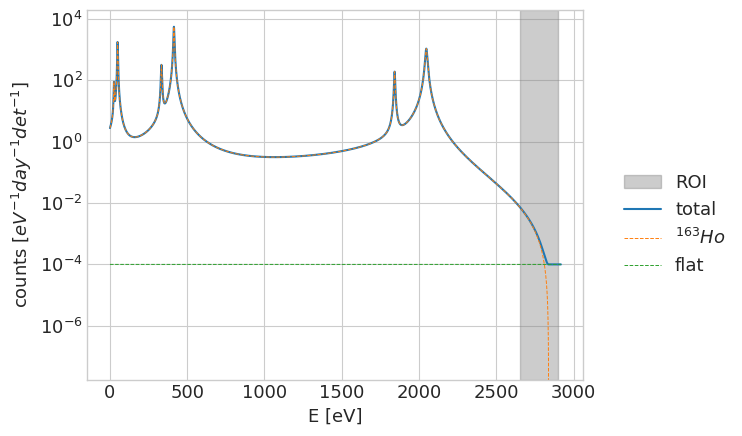

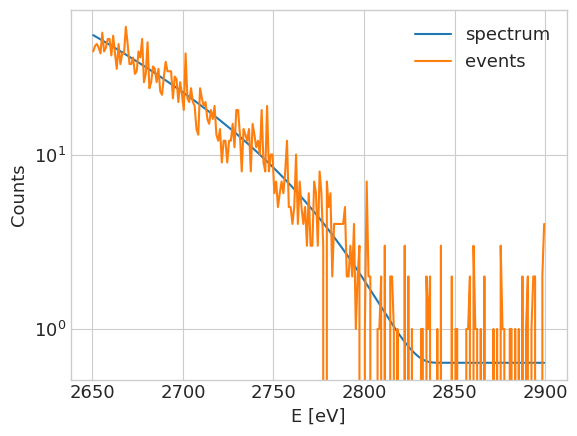

In [6]:
m = 0
A_Ho = 1
bkg = 1e-4
FWHM=5
n_days = 100

s = SpectraSampler({'$^{163}Ho$': [HoSpectrum, [m], A_Ho]}, flat_bkg=bkg, FWHM=FWHM, dE=1, integrate=False)
s.plot_spectrum()
s.set_measure_time(n_days, n_det=64)

events = s.sample()[0]
s.plot_events(events)


 ---- Sampling the priors ---- 


 ---- Prior predictive check ---- 



/home/pietro/.virtualenvs/baynesenv/lib/python3.10/site-packages/baynes/plotter.py:257: RuntimeWarning: invalid value encountered in divide
  ax1.fill_between(np.arange(len(events)), (lo-events)/np.sqrt(events), (hi-events)/np.sqrt(events),
/home/pietro/.virtualenvs/baynesenv/lib/python3.10/site-packages/baynes/plotter.py:257: RuntimeWarning: divide by zero encountered in divide
  ax1.fill_between(np.arange(len(events)), (lo-events)/np.sqrt(events), (hi-events)/np.sqrt(events),


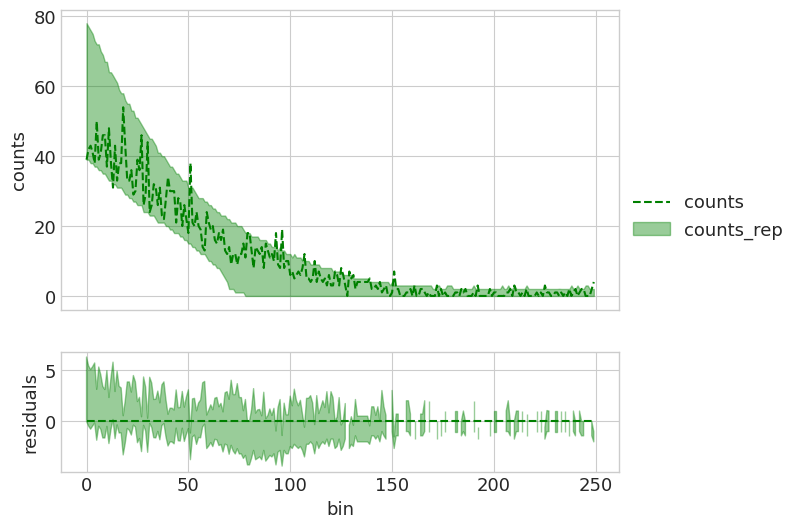


 ---- Prior distribustions ---- 



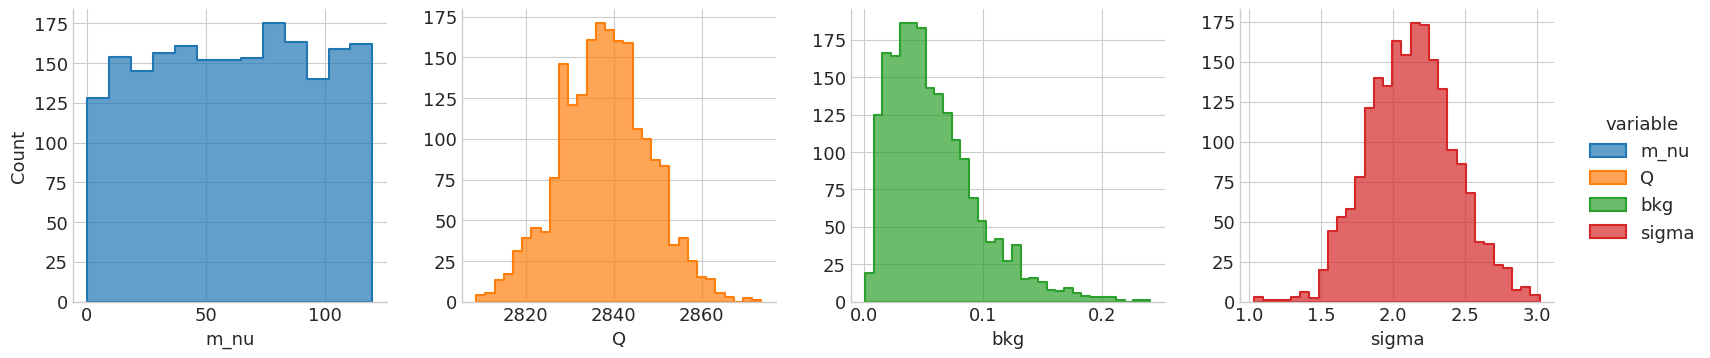


 ---- Fitting the model ---- 



chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

                                                                                                                                                                                                                                                                                                                                
Processing csv files: /tmp/tmplhb0f60t/Ho_spectrum9xmujqsj/Ho_spectrum-20230622133045_1.csvWarning: non-fatal error reading adaptation data
, /tmp/tmplhb0f60t/Ho_spectrum9xmujqsj/Ho_spectrum-20230622133045_2.csvWarning: non-fatal error reading adaptation data
, /tmp/tmplhb0f60t/Ho_spectrum9xmujqsj/Ho_spectrum-20230622133045_3.csvWarning: non-fatal error reading adaptation data
, /tmp/tmplhb0f60t/Ho_spectrum9xmujqsj/Ho_spectrum-20230622133045_4.csvWarning: non-fatal error reading adaptation data


Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BF

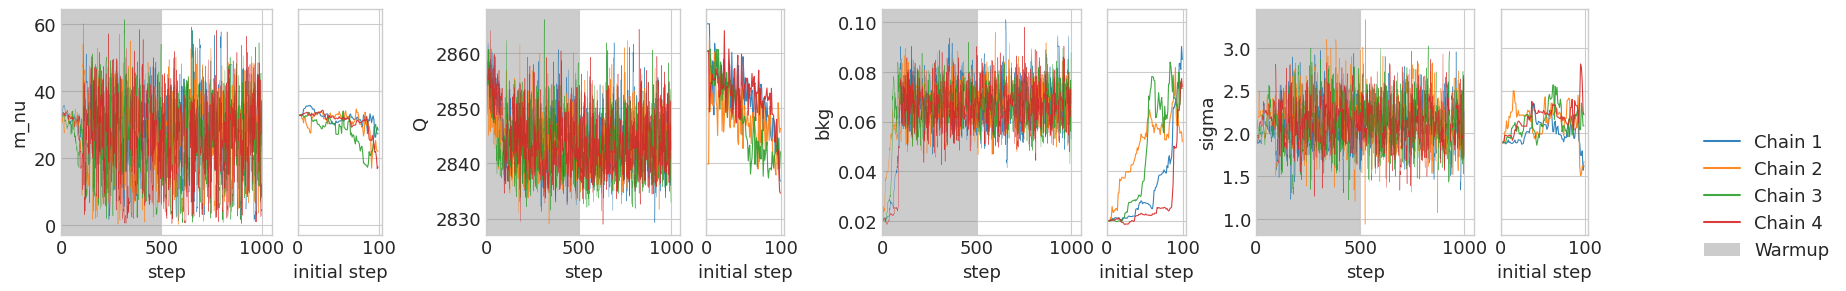


 ---- Prior predictive check ---- 



/home/pietro/.virtualenvs/baynesenv/lib/python3.10/site-packages/baynes/plotter.py:257: RuntimeWarning: divide by zero encountered in divide
  ax1.fill_between(np.arange(len(events)), (lo-events)/np.sqrt(events), (hi-events)/np.sqrt(events),
/home/pietro/.virtualenvs/baynesenv/lib/python3.10/site-packages/baynes/plotter.py:257: RuntimeWarning: invalid value encountered in divide
  ax1.fill_between(np.arange(len(events)), (lo-events)/np.sqrt(events), (hi-events)/np.sqrt(events),


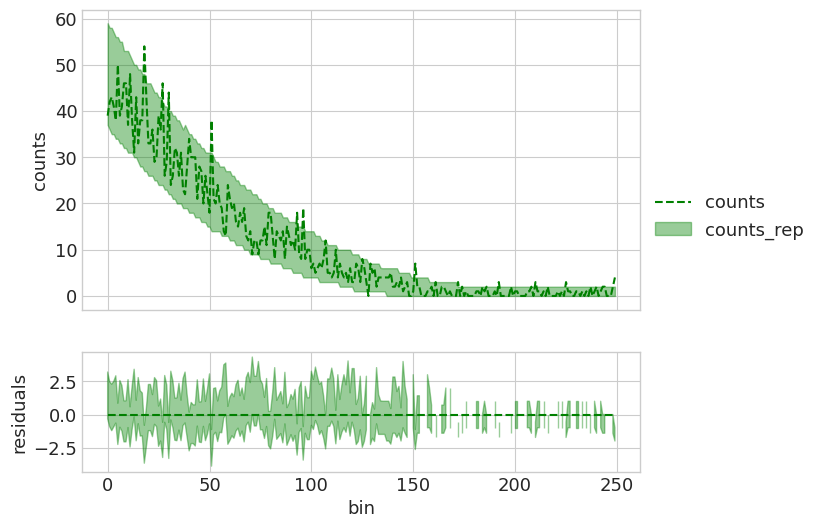


 ---- Posterior distribustions ---- 



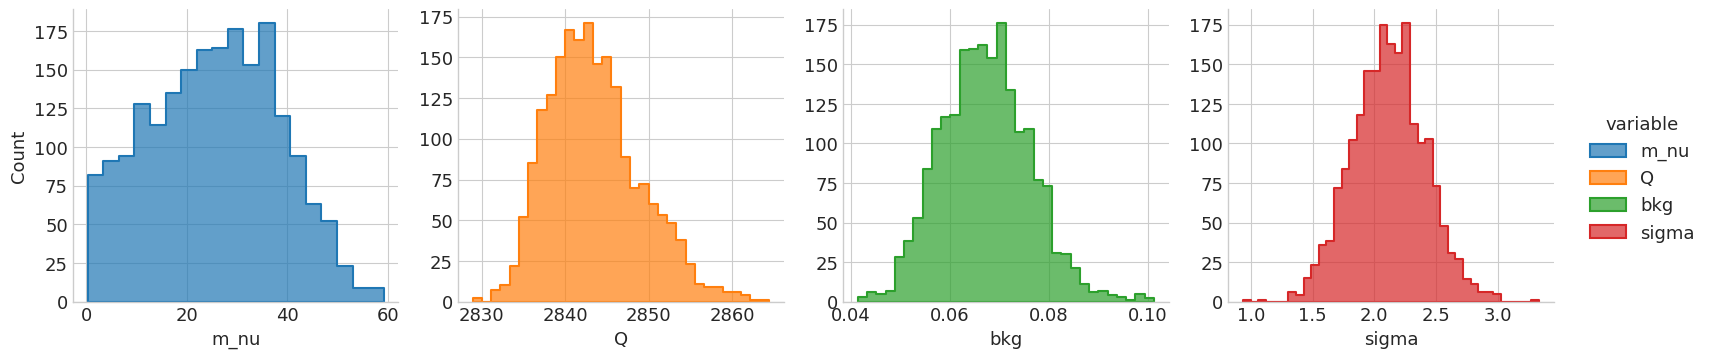


 ---- Prior vs posterior comparison ---- 



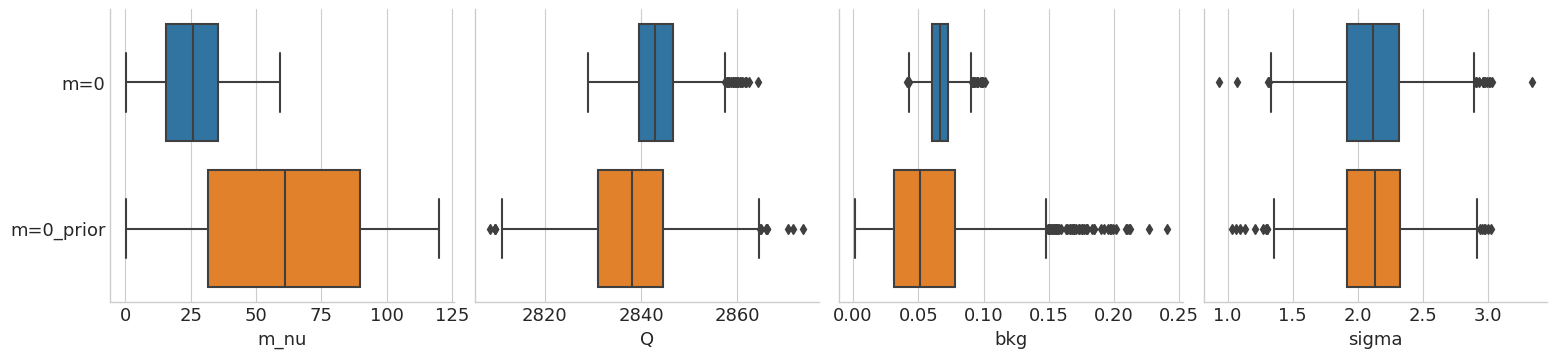

In [7]:
data={'N_bins': len(events), 
      'N_window': 51,
      'x': s.ROI_bin_edges, 
      'counts': events,
      'N_ev': s.n_events,
      'p_Q': 2838,
      'p_FWHM': FWHM,
}

sampler_kwargs={
    'chains': 4,
    'iter_warmup': 500,
    'iter_sampling': 500,
    'save_warmup': True, 
    'adapt_delta': 0.9,
    'threads_per_chain':8
}

plot_pars = ['m_nu', 'Q', 'bkg', 'sigma']
p = FitPlotter(col_wrap=4, style='seaborn-v0_8-whitegrid', save=True)
fit = standard_analysis(model, data, p, sampler_kwargs, fit_title='m=0', plot_params = plot_pars)

In [13]:
%%time
def nu_mass_fit(m):
    s = SpectraSampler({'$^{163}Ho$': [HoSpectrum, [m], A_Ho]}, flat_bkg=bkg, FWHM=FWHM, dE=1, integrate=False)
    s.set_measure_time(n_days, n_det=64)
    events = s.sample()[0]

    data={'N_bins': len(events), 
          'N_window': 51,
          'x': s.ROI_bin_edges, 
          'counts': events,
          'N_ev': s.n_events,
          'p_Q': 2838,
          'p_FWHM': 5,
          'prior': 0,
    }
    
    div = True
    while div is True:
        inits={}
        inits['m_nu_red'] = np.random.beta(1,1.05)/3 #the initial value for m_nu shouldn't be too large
        inits['Q'] = np.random.normal(2838, 10)
        inits['bkg'] = np.random.beta(2.5, 20)
        inits['sigma'] = np.random.normal(s.sigma, 0.3)
            
        fit = model.sample(data,
                           chains=2,
                           iter_warmup=500,
                           iter_sampling=1000,
                           save_warmup=False,
                           show_progress=False,
                           inits=inits,
                           adapt_delta=0.9)
        div = any(fit.divergences)
    return fit

n_fits = 100
n_processes = 16
result = multithreaded_run(nu_mass_fit, [m]*n_fits, n_processes, filename='data/'+str(m)+'_fits.pkl')

Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number of events in ROI:  2778
Number o

In [5]:
pkl_file = open('data/0_fits.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
posteriors = []
for fit in data:
    posteriors.append(fit.draws_pd(['m_nu']).to_numpy().flatten())
posteriors = np.array(posteriors)

68.0% highest density interval:  [9.12898e-03 1.91507e+01]
95.0% highest density interval:  [9.12898e-03 1.91507e+01]


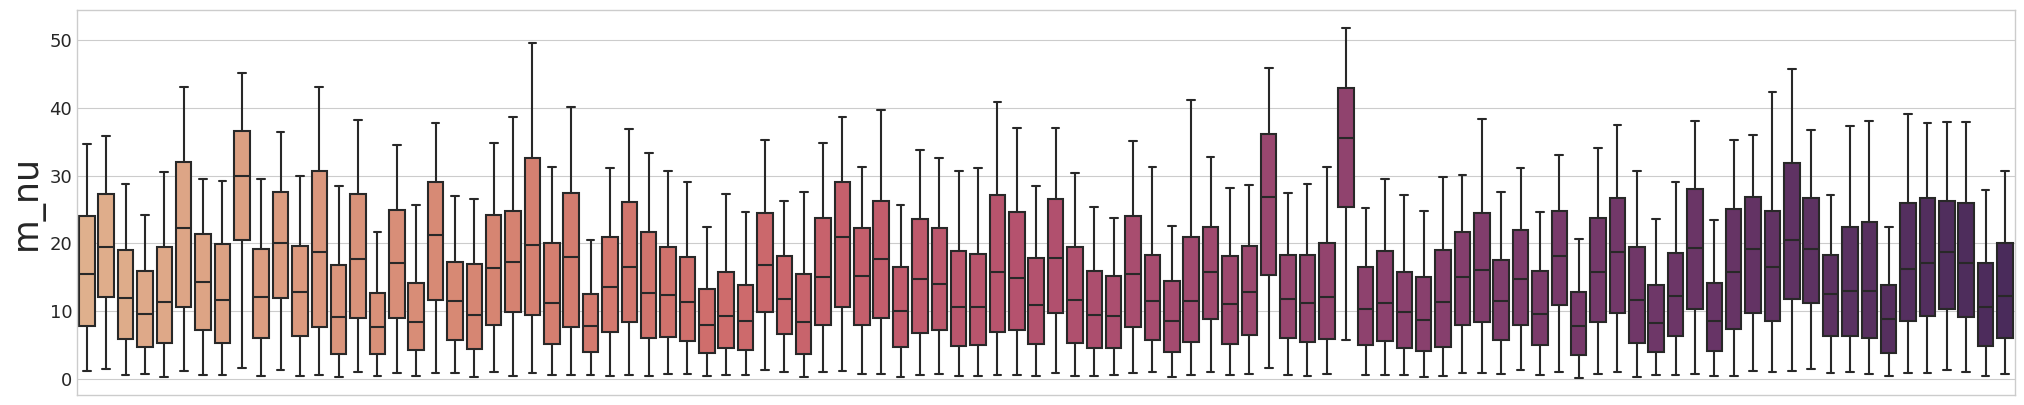

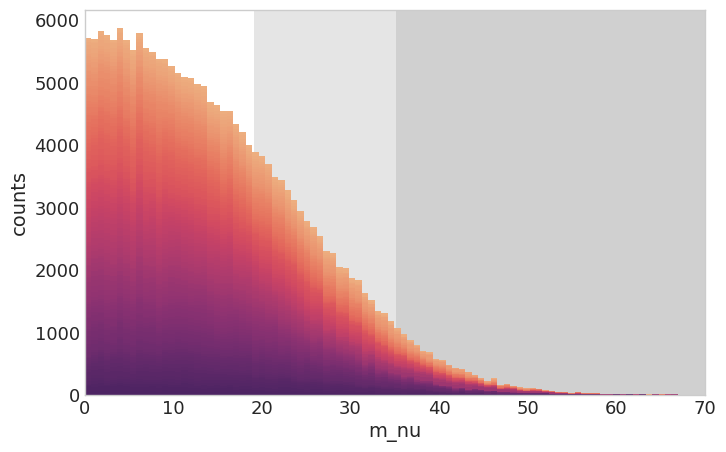

In [6]:
ax = p.new_figure('multi').subplots()
sns.boxplot(posteriors.transpose(), whis=[2.5, 95], showfliers=False, palette='flare', ax=ax)
ax.figure.set_size_inches(25, 5)
ax.set_xticks([])
ax.set_ylabel('m_nu', fontsize=25)


full = posteriors.flatten()
ax = p.new_figure('multi').subplots()
x_max=70

prob = 0.68
print( str(prob*100) + '% highest density interval: ', hdi(full, prob=0.68)) 
ax.axvspan(hdi(full, prob=prob)[1], x_max, color='gray', alpha=0.2, lw=0)

prob = 0.95
print( str(prob*100) + '% highest density interval: ', hdi(full, prob=0.68)) 
ax.axvspan(hdi(full, prob=prob)[1], x_max, color='gray', alpha=0.2, lw=0)

sns.histplot(posteriors.transpose(), bins=100, alpha=1, multiple='stack', legend=False, lw=0., palette='flare', ax=ax)
ax.grid(False)
ax.set_xlim(0, x_max)
ax.set_xlabel('m_nu', fontsize=14)
ax.set_ylabel('counts', fontsize=14)
ax.figure.set_size_inches(8, 5)